<a href="https://colab.research.google.com/github/dariusg21-cyber/sqlexercises/blob/main/Copy_of_SQL_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![DSL_logo](https://raw.githubusercontent.com/BrockDSL/SQL-Workshop/main/dsl_logo.png)


# SQL and Databases

During this workshop we'll learn how to interact with SQL databases. Our focus will be on pulling information from different tables and constructing queries.

# Before we Begin!

1. Please click the 'Copy to Drive' button in the toolbar above
1. Click on the Gear icon next to your picture, Select 'Editor' and make sure 'Show Line Numbers' is selected
1. Share in the chat box a quick hello and where you are in the world right now.

In [1]:
#Libraries
#We'll use Pandas to interact with the SQL file

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import FileLink, display

print("Done loading Library")

Done loading Library


## What's a Database?

The digram above represents how we can conceptualize a database as a series of _tables_ that reference each other. You can think of a _table_ as a very specific spreadsheet. We are going to be looking at a popular database used for teaching SQL that is called [NorthWind](https://docs.yugabyte.com/preview/sample-data/northwind/).

We are going to use a type of SQL connection/file called [SQLite](https://www.sqlite.org/index.html). This loads the SQL database into our environment and we can interact with it directly. Often we use mySQL which requires a connection to an SQL server. We use an environment like when we have lots of data to sort through.

Run the next cell to download and connect to that Database.

![ERD_Diagram](https://github.com/BrockDSL/SQL-Workshop/blob/main/Northwind_ERD.png?raw=true)

In [2]:
#Load SQLite File
!wget -O northwind.db "https://github.com/BrockDSL/SQL-Workshop/blob/main/northwind.db?raw=true"
try:
    connection = sqlite3.connect("northwind.db")
    print("Connection Successful!")
except:
    print("Error connecting to the database")


--2023-06-01 14:21:16--  https://github.com/BrockDSL/SQL-Workshop/blob/main/northwind.db?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/BrockDSL/SQL-Workshop/raw/main/northwind.db [following]
--2023-06-01 14:21:16--  https://github.com/BrockDSL/SQL-Workshop/raw/main/northwind.db
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/BrockDSL/SQL-Workshop/main/northwind.db [following]
--2023-06-01 14:21:16--  https://raw.githubusercontent.com/BrockDSL/SQL-Workshop/main/northwind.db
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 20

## Talking to the Database

We use a special kind of syntax to access the information that is in the database. We call this an _sql query_. It is very much structured like a sentence.

### Show Tables

Our first query will be to show all the tables in our database. Using the following:

```SQL
SELECT name FROM sqlite_master WHERE type='table';
```


In [3]:
QUERY = \
"""

SELECT name FROM sqlite_master WHERE type='table'

"""
try:
    result = pd.read_sql_query(QUERY, connection)
    display(result)
except:
    print("SQL is incorrect")

,name
0,Categories
1,sqlite_sequence
2,CustomerCustomerDemo
3,CustomerDemographics
4,Customers
5,Employees
6,EmployeeTerritories
7,Order Details
8,Orders
9,Products


### Show All Customers and Details

We use the wildcard `*` to match any colum from the data.

```SQL

SELECT * FROM Customers;

```

In [4]:
QUERY = \
"""

SELECT * FROM Customers;

"""
try:
    result = pd.read_sql_query(QUERY, connection)
    display(result)
except:
    print("SQL is incorrect")

,CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,Western Europe,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,Central America,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,Central America,05023,Mexico,(5) 555-3932,None
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,British Isles,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
4,BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,Northern Europe,S-958 22,Sweden,0921-12 34 65,0921-12 34 67
...,...,...,...,...,...,...,...,...,...,...,...
88,WARTH,Wartian Herkku,Pirkko Koskitalo,Accounting Manager,Torikatu 38,Oulu,Scandinavia,90110,Finland,981-443655,981-443655
89,WELLI,Wellington Importadora,Paula Parente,Sales Manager,"Rua do Mercado, 12",Resende,South America,08737-363,Brazil,(14) 555-8122,None
90,WHITC,White Clover Markets,Karl Jablonski,Owner,305 - 14th Ave. S. Suite 3B,Seattle,North America,98128,USA,(206) 555-4112,(206) 555-4115
91,WILMK,Wilman Kala,Matti Karttunen,Owner/Marketing Assistant,Keskuskatu 45,Helsinki,Scandinavia,21240,Finland,90-224 8858,90-224 8858


### Show certain information about Customers

We can name columns specifically if we want to only select those. See how this example is different than the previous.

```SQL

SELECT ContactName, Phone FROM Customers;

```

In [5]:
QUERY = \
"""

SELECT ContactName, Phone FROM Customers;

"""
try:
    result = pd.read_sql_query(QUERY, connection)
    display(result)
except:
    print("SQL is incorrect")

,ContactName,Phone
0,Maria Anders,030-0074321
1,Ana Trujillo,(5) 555-4729
2,Antonio Moreno,(5) 555-3932
3,Thomas Hardy,(171) 555-7788
4,Christina Berglund,0921-12 34 65
...,...,...
88,Pirkko Koskitalo,981-443655
89,Paula Parente,(14) 555-8122
90,Karl Jablonski,(206) 555-4112
91,Matti Karttunen,90-224 8858


### Selecting and Ordering

We can order by any of the fields that we select.

```SQL
SELECT ContactName, Country FROM Customers ORDER BY Country;

```

In [6]:
QUERY = \
"""

SELECT ContactName, Country FROM Customers ORDER BY Country;

"""
try:
    result = pd.read_sql_query(QUERY, connection)
    display(result)
except:
    print("SQL is incorrect")

,ContactName,Country
0,Val2,None
1,Valon Hoti,None
2,Patricio Simpson,Argentina
3,Yvonne Moncada,Argentina
4,Sergio Gutiérrez,Argentina
...,...,...
88,Karl Jablonski,USA
89,Manuel Pereira,Venezuela
90,Carlos Hernández,Venezuela
91,Carlos González,Venezuela


### Selecting and Comparing Values

We can test to see if something is `>`, `>=`, `<`, `<=`, or `=` as in the following.

```SQL
SELECT * from Orders WHERE Freight > 50;

```

In [7]:
QUERY = \
"""

SELECT * from Orders WHERE Freight > 50;

"""
try:
    result = pd.read_sql_query(QUERY, connection)
    display(result)
except:
    print("SQL is incorrect")

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10250,HANAR,4,2016-07-08,2016-08-05,2016-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
1,10252,SUPRD,4,2016-07-09,2016-08-06,2016-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium
2,10253,HANAR,3,2016-07-10,2016-07-24,2016-07-16,2,58.17,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10255,RICSU,9,2016-07-12,2016-08-09,2016-07-15,3,148.33,Richter Supermarkt,Starenweg 5,Genève,Western Europe,1204,Switzerland
4,10257,HILAA,4,2016-07-16,2016-08-13,2016-07-22,3,81.91,HILARION-Abastos,Carrera 22 con Ave. Carlos Soublette #8-35,San Cristóbal,South America,5022,Venezuela
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,11059,RICAR,2,2018-04-29,2018-06-10,None,2,85.80,Ricardo Adocicados,"Av. Copacabana, 267",Rio de Janeiro,South America,02389-890,Brazil
356,11063,HUNGO,3,2018-04-30,2018-05-28,2018-05-06,2,81.73,Hungry Owl All-Night Grocers,8 Johnstown Road,Cork,British Isles,None,Ireland
357,11068,QUEEN,8,2018-05-04,2018-06-01,None,2,81.75,Queen Cozinha,"Alameda dos Canàrios, 891",Sao Paulo,South America,05487-020,Brazil
358,11070,LEHMS,2,2018-05-05,2018-06-02,None,1,136.00,Lehmanns Marktstand,Magazinweg 7,Frankfurt a.M.,Western Europe,60528,Germany


### Some Tables for Questions

Run the following cells to display some tables to the screen that will help you answer Q1 - Q3. Share in the chat-box when you have completed those questions.

In [ ]:
QUERY = \
"""

SELECT * FROM Products;

"""
try:
    result = pd.read_sql_query(QUERY, connection)
    display(result)
except:
    print("SQL is incorrect")

In [ ]:
QUERY = \
"""

SELECT * FROM Suppliers;

"""
try:
    result = pd.read_sql_query(QUERY, connection)
    display(result)
except:
    print("SQL is incorrect")

### Q1

Write an SQL query to select all _Products_ that have a _UnitPrice_ greater than 10. (Part of the query is written in for you already.)


In [8]:
QUERY = \
"""

SELECT * FROM products WHERE UnitPrice > 10;


"""
try:
    result = pd.read_sql_query(QUERY, connection)
    display(result)
except:
    print("SQL is incorrect")

,ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
3,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1
4,6,Grandma's Boysenberry Spread,3,2,12 - 8 oz jars,25.00,120,0,25,0
...,...,...,...,...,...,...,...,...,...,...
58,71,Flotemysost,15,4,10 - 500 g pkgs.,21.50,26,0,0,0
59,72,Mozzarella di Giovanni,14,4,24 - 200 g pkgs.,34.80,14,0,0,0
60,73,Röd Kaviar,17,8,24 - 150 g jars,15.00,101,0,5,0
61,76,Lakkalikööri,23,1,500 ml,18.00,57,0,20,0


### Q2


Write an SQL query to select _Company Name_ and _Country_ from the _Suppliers_ table and order the results by Country. (Part of the query is written in for you already.)

In [9]:
QUERY = \
"""

SELECT companyName, country FROM Suppliers ORDER BY country;

"""
try:
    result = pd.read_sql_query(QUERY, connection)
    display(result)
except:
    print("SQL is incorrect")

,CompanyName,Country
0,"Pavlova, Ltd.",Australia
1,"G'day, Mate",Australia
2,Refrescos Americanas LTDA,Brazil
3,Ma Maison,Canada
4,Forêts d'érables,Canada
5,Lyngbysild,Denmark
6,Karkki Oy,Finland
7,Aux joyeux ecclésiastiques,France
8,Escargots Nouveaux,France
9,Gai pâturage,France


### Q3

Write an SQL query to show you _ProductName_ and _UnitPrice_ for any item that has more than 20 units in stock.Write an SQL query to (Part of the query is written in for you already.)

In [16]:
QUERY = \
"""

SELECT ProductName, UnitPrice FROM Products WHERE unitsinstock > 20;


"""
try:
    result = pd.read_sql_query(QUERY, connection)
    display(result)
except:
    print("SQL is incorrect")

,ProductName,UnitPrice
0,Chai,18.00
1,Chef Anton's Cajun Seasoning,22.00
2,Grandma's Boysenberry Spread,25.00
3,Mishi Kobe Niku,97.00
4,Ikura,31.00
5,Queso Cabrales,21.00
6,Queso Manchego La Pastora,38.00
7,Konbu,6.00
8,Tofu,23.25
9,Genen Shouyu,15.50


## Aggregate Functions

We can peform some basic math with our select statements using aggregate Functions

```
MIN
MAX
AVG
SUM
COUNT
```

---- 

### AVG

What is the average price of all of the products that this company sells?

```SQL

Select AVG(UnitPrice) from Products;

```

In [17]:
QUERY = \
"""

Select AVG(UnitPrice) from Products;

"""
try:
    result = pd.read_sql_query(QUERY, connection)
    display(result)
except:
    print("SQL is incorrect")

,AVG(UnitPrice)
0,28.866364


### COUNT

How many employees does this company have?

```SQL

SELECT COUNT(EmployeeID) From Employees;

```

In [ ]:
QUERY = \
"""

SELECT COUNT(EmployeeID) From Employees;

"""
try:
    result = pd.read_sql_query(QUERY, connection)
    display(result)
except:
    print("SQL is incorrect")

In [ ]:
QUERY = \
"""

SELECT * From Employees;

"""
try:
    result = pd.read_sql_query(QUERY, connection)
    display(result)
except:
    print("SQL is incorrect")

### Some Tables for Questions

Run the following cell to display a table to the screen that will help you answer Q4 - Q6. Share in the chat-box when you have completed those questions.

In [ ]:
QUERY = \
"""

SELECT * FROM Products;

"""
try:
    result = pd.read_sql_query(QUERY, connection)
    display(result)
except:
    print("SQL is incorrect")

### Q4

What product has the most units in *stock*? How many units are in stock, and what is the product called?

In [19]:
QUERY = \
"""

SELECT ProductName, MAX(UnitsInStock) FROM Products;

"""
try:
    result = pd.read_sql_query(QUERY, connection)
    display(result)
except:
    print("SQL is incorrect")

,ProductName,MAX(UnitsInStock)
0,Rhönbräu Klosterbier,125


### Q5

What product has the most units on *order*? How many units are on order, and what is that product called?

In [21]:
QUERY = \
"""
SELECT ProductName, MAX(UnitsonOrder) FROM products;

"""
try:
    result = pd.read_sql_query(QUERY, connection)
    display(result)
except:
    print("SQL is incorrect")

,ProductName,MAX(UnitsonOrder)
0,Louisiana Hot Spiced Okra,100


### Q6

What is the total (ie SUM) of all of the products that are in stock and are in category 2.

In [26]:
QUERY = \
"""

SELECT SUM(UnitsInStock) 
FROM Products 
WHERE CategoryId = 2 ;


"""
try:
    result = pd.read_sql_query(QUERY, connection)
    display(result)
except:
    print("SQL is incorrect")

,SUM(UnitsInStock)
0,507


## Selecting from Multiple Databases

The real power in SQL is the ability to create queries that span multiple tables. This section of questions demonstrates how we can do it with **nested queries**

### Show Orders and include Customer Info

Show all the orders associated with Nancy Davolio


```SQL

SELECT * FROM Orders WHERE EmployeeID 

IN(SELECT EmployeeID FROM Employees WHERE FirstName = "Nancy");

```

In [27]:
QUERY = \
"""

SELECT * FROM Orders WHERE EmployeeID 

IN(SELECT EmployeeID FROM Employees WHERE FirstName = "Nancy");


"""
try:
    result = pd.read_sql_query(QUERY, connection)
    display(result)
except:
    print("SQL is incorrect")

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10258,ERNSH,1,2016-07-17,2016-08-14,2016-07-23,1,140.51,Ernst Handel,Kirchgasse 6,Graz,Western Europe,8010,Austria
1,10270,WARTH,1,2016-08-01,2016-08-29,2016-08-02,1,136.54,Wartian Herkku,Torikatu 38,Oulu,Scandinavia,90110,Finland
2,10275,MAGAA,1,2016-08-07,2016-09-04,2016-08-09,1,26.93,Magazzini Alimentari Riuniti,Via Ludovico il Moro 22,Bergamo,Southern Europe,24100,Italy
3,10285,QUICK,1,2016-08-20,2016-09-17,2016-08-26,2,76.83,QUICK-Stop,Taucherstraße 10,Cunewalde,Western Europe,1307,Germany
4,10292,TRADH,1,2016-08-28,2016-09-25,2016-09-02,2,1.35,Tradiçao Hipermercados,"Av. Inês de Castro, 414",Sao Paulo,South America,05634-030,Brazil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,11064,SAVEA,1,2018-05-01,2018-05-29,2018-05-04,1,30.09,Save-a-lot Markets,187 Suffolk Ln.,Boise,North America,83720,USA
119,11067,DRACD,1,2018-05-04,2018-05-18,2018-05-06,2,7.98,Drachenblut Delikatessen,Walserweg 21,Aachen,Western Europe,52066,Germany
120,11069,TORTU,1,2018-05-04,2018-06-01,2018-05-06,2,15.67,Tortuga Restaurante,Avda. Azteca 123,México D.F.,Central America,5033,Mexico
121,11071,LILAS,1,2018-05-05,2018-06-02,None,1,0.93,LILA-Supermercado,Carrera 52 con Ave. Bolívar #65-98 Llano Largo,Barquisimeto,South America,3508,Venezuela


In [28]:
#Let's doublecheck

QUERY = \
"""

SELECT * FROM Employees;

"""
try:
    result = pd.read_sql_query(QUERY, connection)
    display(result)
except:
    print("SQL is incorrect")

,EmployeeID,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1968-12-08,2012-05-01,507 - 20th Ave. E.Apt. 2A,Seattle,North America,98122,USA,(206) 555-9857,5467,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1972-02-19,2012-08-14,908 W. Capital Way,Tacoma,North America,98401,USA,(206) 555-9482,3457,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp
2,3,Leverling,Janet,Sales Representative,Ms.,1983-08-30,2012-04-01,722 Moss Bay Blvd.,Kirkland,North America,98033,USA,(206) 555-3412,3355,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp
3,4,Peacock,Margaret,Sales Representative,Mrs.,1957-09-19,2013-05-03,4110 Old Redmond Rd.,Redmond,North America,98052,USA,(206) 555-8122,5176,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp
4,5,Buchanan,Steven,Sales Manager,Mr.,1975-03-04,2013-10-17,14 Garrett Hill,London,British Isles,SW1 8JR,UK,(71) 555-4848,3453,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp
5,6,Suyama,Michael,Sales Representative,Mr.,1983-07-02,2013-10-17,Coventry House\nMiner Rd.,London,British Isles,EC2 7JR,UK,(71) 555-7773,428,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...,Michael is a graduate of Sussex University (MA...,5.0,http://accweb/emmployees/davolio.bmp
6,7,King,Robert,Sales Representative,Mr.,1980-05-29,2014-01-02,Edgeham Hollow\nWinchester Way,London,British Isles,RG1 9SP,UK,(71) 555-5598,465,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...,Robert King served in the Peace Corps and trav...,5.0,http://accweb/emmployees/davolio.bmp
7,8,Callahan,Laura,Inside Sales Coordinator,Ms.,1978-01-09,2014-03-05,4726 - 11th Ave. N.E.,Seattle,North America,98105,USA,(206) 555-1189,2344,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...,Laura received a BA in psychology from the Uni...,2.0,http://accweb/emmployees/davolio.bmp
8,9,Dodsworth,Anne,Sales Representative,Ms.,1986-01-27,2014-11-15,7 Houndstooth Rd.,London,British Isles,WG2 7LT,UK,(71) 555-4444,452,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...,Anne has a BA degree in English from St. Lawre...,5.0,http://accweb/emmployees/davolio.bmp


### Show all products that are beverages

```SQL

SELECT * FROM Products WHERE CategoryID

IN(SELECT CategoryID FROM Categories WHERE CategoryName = "Beverages");

```

In [29]:
QUERY = \
"""

SELECT * FROM Products WHERE CategoryID

IN(SELECT CategoryID FROM Categories WHERE CategoryName = "Beverages");


"""
try:
    result = pd.read_sql_query(QUERY, connection)
    display(result)
except:
    print("SQL is incorrect")

,ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,24,Guaraná Fantástica,10,1,12 - 355 ml cans,4.50,20,0,0,1
3,34,Sasquatch Ale,16,1,24 - 12 oz bottles,14.00,111,0,15,0
4,35,Steeleye Stout,16,1,24 - 12 oz bottles,18.00,20,0,15,0
5,38,Côte de Blaye,18,1,12 - 75 cl bottles,263.50,17,0,15,0
6,39,Chartreuse verte,18,1,750 cc per bottle,18.00,69,0,5,0
7,43,Ipoh Coffee,20,1,16 - 500 g tins,46.00,17,10,25,0
8,67,Laughing Lumberjack Lager,16,1,24 - 12 oz bottles,14.00,52,0,10,0
9,70,Outback Lager,7,1,24 - 355 ml bottles,15.00,15,10,30,0


In [45]:
#Let's doublecheck

QUERY = \
"""

SELECT * FROM Categories;

"""
try:
    result = pd.read_sql_query(QUERY, connection)
    display(result)
except:
    print("SQL is incorrect")

,CategoryID,CategoryName,Description,Picture
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an...",b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...
2,3,Confections,"Desserts, candies, and sweet breads",b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...
3,4,Dairy Products,Cheeses,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal",b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...
5,6,Meat/Poultry,Prepared meats,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...
6,7,Produce,Dried fruit and bean curd,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...
7,8,Seafood,Seaweed and fish,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...


### Show all products that are protiens

```SQL

SELECT * FROM Products WHERE CategoryID

IN(SELECT CategoryID FROM Categories WHERE CategoryName = "Meat/Poultry" OR CategoryName = "Seafood");

```

In [46]:
QUERY = \
"""

SELECT * FROM Products WHERE CategoryID

IN(SELECT CategoryID FROM Categories WHERE CategoryName = "Meat/Poultry" OR CategoryName = "Seafood");

"""
try:
    result = pd.read_sql_query(QUERY, connection)
    display(result)
except:
    print("SQL is incorrect")

,ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,9,Mishi Kobe Niku,4,6,18 - 500 g pkgs.,97.00,29,0,0,1
1,10,Ikura,4,8,12 - 200 ml jars,31.00,31,0,0,0
2,13,Konbu,6,8,2 kg box,6.00,24,0,5,0
3,17,Alice Mutton,7,6,20 - 1 kg tins,39.00,0,0,0,1
4,18,Carnarvon Tigers,7,8,16 kg pkg.,62.50,42,0,0,0
5,29,Thüringer Rostbratwurst,12,6,50 bags x 30 sausgs.,123.79,0,0,0,1
6,30,Nord-Ost Matjeshering,13,8,10 - 200 g glasses,25.89,10,0,15,0
7,36,Inlagd Sill,17,8,24 - 250 g jars,19.00,112,0,20,0
8,37,Gravad lax,17,8,12 - 500 g pkgs.,26.00,11,50,25,0
9,40,Boston Crab Meat,19,8,24 - 4 oz tins,18.40,123,0,30,0


In [48]:
#Let's doublecheck

QUERY = \
"""

SELECT * FROM Categories;

"""
try:
    result = pd.read_sql_query(QUERY, connection)
    display(result)
except:
    print("SQL is incorrect")

,CategoryID,CategoryName,Description,Picture
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an...",b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...
2,3,Confections,"Desserts, candies, and sweet breads",b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...
3,4,Dairy Products,Cheeses,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal",b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...
5,6,Meat/Poultry,Prepared meats,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...
6,7,Produce,Dried fruit and bean curd,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...
7,8,Seafood,Seaweed and fish,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...


### Some Tables for Questions

Run the following cell to display a table to the screen that will help you answer Q7 - Q9. Share in the chat-box when you have completed those questions.

In [31]:
QUERY = \
"""

SELECT * FROM Suppliers;

"""
try:
    result = pd.read_sql_query(QUERY, connection)
    display(result)
except:
    print("SQL is incorrect")

,SupplierID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax,HomePage
0,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,British Isles,EC1 4SD,UK,(171) 555-2222,None,None
1,2,New Orleans Cajun Delights,Shelley Burke,Order Administrator,P.O. Box 78934,New Orleans,North America,70117,USA,(100) 555-4822,None,#CAJUN.HTM#
2,3,Grandma Kelly's Homestead,Regina Murphy,Sales Representative,707 Oxford Rd.,Ann Arbor,North America,48104,USA,(313) 555-5735,(313) 555-3349,None
3,4,Tokyo Traders,Yoshi Nagase,Marketing Manager,9-8 Sekimai\nMusashino-shi,Tokyo,Eastern Asia,100,Japan,(03) 3555-5011,None,None
4,5,Cooperativa de Quesos 'Las Cabras',Antonio del Valle Saavedra,Export Administrator,Calle del Rosal 4,Oviedo,Southern Europe,33007,Spain,(98) 598 76 54,None,None
5,6,Mayumi's,Mayumi Ohno,Marketing Representative,92 Setsuko\nChuo-ku,Osaka,Eastern Asia,545,Japan,(06) 431-7877,None,Mayumi's (on the World Wide Web)#http://www.mi...
6,7,"Pavlova, Ltd.",Ian Devling,Marketing Manager,74 Rose St.\nMoonie Ponds,Melbourne,Victoria,3058,Australia,(03) 444-2343,(03) 444-6588,None
7,8,"Specialty Biscuits, Ltd.",Peter Wilson,Sales Representative,29 King's Way,Manchester,British Isles,M14 GSD,UK,(161) 555-4448,None,None
8,9,PB Knäckebröd AB,Lars Peterson,Sales Agent,Kaloadagatan 13,Göteborg,None,S-345 67,Sweden,031-987 65 43,031-987 65 91,None
9,10,Refrescos Americanas LTDA,Carlos Diaz,Marketing Manager,Av. das Americanas 12.890,São Paulo,South America,5442,Brazil,(11) 555 4640,None,None


In [30]:
QUERY = \
"""

SELECT * FROM Products;

"""
try:
    result = pd.read_sql_query(QUERY, connection)
    display(result)
except:
    print("SQL is incorrect")

,ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
72,73,Röd Kaviar,17,8,24 - 150 g jars,15.00,101,0,5,0
73,74,Longlife Tofu,4,7,5 kg pkg.,10.00,4,20,5,0
74,75,Rhönbräu Klosterbier,12,1,24 - 0.5 l bottles,7.75,125,0,25,0
75,76,Lakkalikööri,23,1,500 ml,18.00,57,0,20,0


### Q7

Write a query to display all of the products that come from the company called Exotic Liquids. (Part of the query is written for you.)

In [32]:
QUERY = \
"""

SELECT * FROM Products WHERE SupplierID

IN(SELECT SupplierID FROM Suppliers WHERE CompanyName = "Exotic Liquids");


"""
try:
    result = pd.read_sql_query(QUERY, connection)
    display(result)
except:
    print("SQL is incorrect")

,ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10,13,70,25,0


### Q8

What categories of products does "Leka Trading" make? (Part of the query is written for you.)

In [52]:
QUERY = \
"""

SELECT CategoryID FROM Products WHERE ProductID

IN(SELECT productID FROM suppliers WHERE CompanyName = "Leka Trading");

"""
try:
    result = pd.read_sql_query(QUERY, connection)
    display(result)
except:
    print("SQL is incorrect")

,CategoryID
0,1
1,1
2,2
3,2
4,2
...,...
72,8
73,7
74,1
75,1


### Q9



Write a query to display the names of the products that come from the company called "Bigfoot Breweries".

In [34]:
QUERY = \
"""

SELECT ProductName FROM Products WHERE SupplierID

IN (SELECT SupplierID FROM Suppliers WHERE CompanyName = "Bigfoot Breweries");


"""
try:
    result = pd.read_sql_query(QUERY, connection)
    display(result)
except:
    print("SQL is incorrect")

,ProductName
0,Sasquatch Ale
1,Steeleye Stout
2,Laughing Lumberjack Lager


## Basic Visualization Stuff

When we build a query against SQL in Pandas and then visualize our results by piping it into Matplotlib. Here we'll visualize who our 10 best customers are.

,CustomerID,COUNT(CustomerID)
0,SAVEA,31
1,ERNSH,30
2,QUICK,28
3,HUNGO,19
4,FOLKO,19
5,RATTC,18
6,HILAA,18
7,BERGS,18
8,BONAP,17
9,WARTH,15


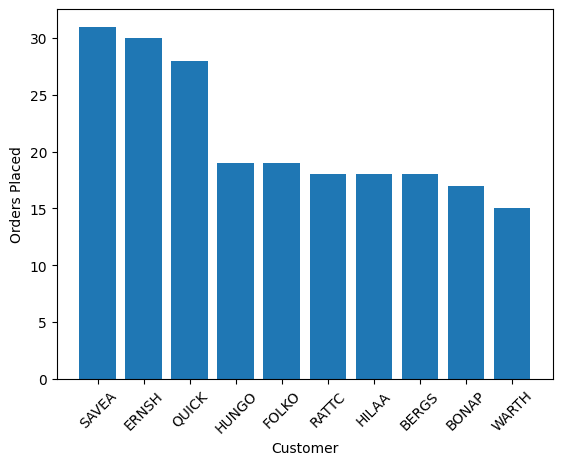

In [37]:
QUERY = \
"""
SELECT 
    CustomerID, 
    COUNT(CustomerID) 
FROM 
    Orders 
GROUP BY 
    CustomerID 
    
ORDER BY 
    COUNT(CustomerID) DESC;

"""
try:
    #This next line limits our results to the top 10 rows of our results
    result = pd.read_sql_query(QUERY, connection)[0:10]
    display(result)
    plt.bar(result["CustomerID"],result["COUNT(CustomerID)"])
    plt.xticks(rotation = 45)
    plt.ylabel("Orders Placed")
    plt.xlabel("Customer")
    plt.show()
except:
    print("SQL is incorrect")


### One Last Question

Run the next query help you complete Q10. That is the last question of our workshop.


In [61]:
QUERY = \
"""

SELECT 
    * 
FROM 
    orders
    ;

"""
try:
    result = pd.read_sql_query(QUERY, connection)
    display(result)
except:
    print("SQL is incorrect")

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2016-07-04,2016-08-01,2016-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l-Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2016-07-05,2016-08-16,2016-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2016-07-08,2016-08-05,2016-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2016-07-08,2016-08-05,2016-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2016-07-09,2016-08-06,2016-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,11073,PERIC,2,2018-05-05,2018-06-02,None,2,24.95,Pericles Comidas clásicas,Calle Dr. Jorge Cash 321,México D.F.,Central America,5033,Mexico
826,11074,SIMOB,7,2018-05-06,2018-06-03,None,2,18.44,Simons bistro,Vinbæltet 34,Kobenhavn,Northern Europe,1734,Denmark
827,11075,RICSU,8,2018-05-06,2018-06-03,None,2,6.19,Richter Supermarkt,Starenweg 5,Genève,Western Europe,1204,Switzerland
828,11076,BONAP,4,2018-05-06,2018-06-03,None,2,38.28,Bon app-,"12, rue des Bouchers",Marseille,Western Europe,13008,France


### Q10

See if you can complete the SQL query to make a bar graph to display a bar graph of the what employees have sold the most.

,EmployeeID,COUNT(EmployeeID)
0,1,123
1,2,96
2,3,127
3,4,156
4,5,42
5,6,67
6,7,72
7,8,104
8,9,43


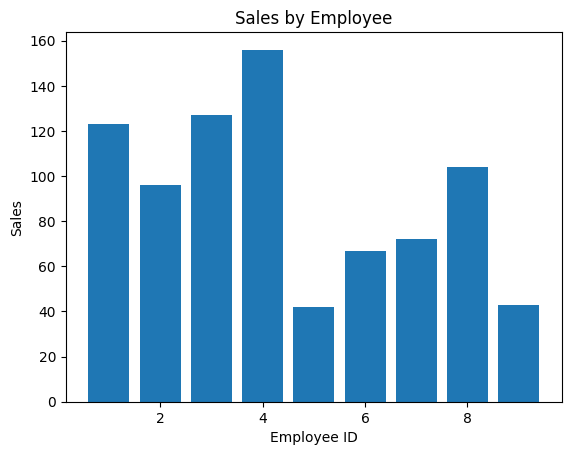

In [67]:
QUERY = \
"""

SELECT 
    EmployeeID, 
    COUNT(EmployeeID) 
FROM 
      Orders 
GROUP BY 
    EmployeeID;


"""
try:
    result = pd.read_sql_query(QUERY, connection)
    display(result)
    plt.bar(result["EmployeeID"],result["COUNT(EmployeeID)"])
    plt.title("Sales by Employee")
    plt.ylabel("Sales")
    plt.xlabel("Employee ID")
    plt.show()
except:
    print("SQL is incorrect")
    


## One last thing! Getting Results out of SQL

It is possible to take your SQL query and put it into something like a CSV file so that you can work with the data directly in something like Excel. The following cell demonstrates this.

In [68]:
QUERY = \
"""

SELECT * FROM CUSTOMERS;

"""
try:
    result = pd.read_sql_query(QUERY, connection)
    result.to_csv('SQL_output.csv',index=False)
    display(result)
    
except:
    print("SQL is incorrect")

,CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,Western Europe,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,Central America,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,Central America,05023,Mexico,(5) 555-3932,None
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,British Isles,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
4,BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,Northern Europe,S-958 22,Sweden,0921-12 34 65,0921-12 34 67
...,...,...,...,...,...,...,...,...,...,...,...
88,WARTH,Wartian Herkku,Pirkko Koskitalo,Accounting Manager,Torikatu 38,Oulu,Scandinavia,90110,Finland,981-443655,981-443655
89,WELLI,Wellington Importadora,Paula Parente,Sales Manager,"Rua do Mercado, 12",Resende,South America,08737-363,Brazil,(14) 555-8122,None
90,WHITC,White Clover Markets,Karl Jablonski,Owner,305 - 14th Ave. S. Suite 3B,Seattle,North America,98128,USA,(206) 555-4112,(206) 555-4115
91,WILMK,Wilman Kala,Matti Karttunen,Owner/Marketing Assistant,Keskuskatu 45,Helsinki,Scandinavia,21240,Finland,90-224 8858,90-224 8858


## Downloading your file

Once you have made the SQL query that you want in the cell above, run this next cell to get a link to download your file.

In [69]:
#If by chance you are working working in Anaconda 
#comment lines 5,6 uncomment 2
#FileLink('./SQL_output.csv')

from google.colab import files
files.download('SQL_output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Congratulations!

Congratulations, you have successfully been introduced to SQL and how you can interact with it. It gets **very complex** quickly. There are lots of other places you can go with this.


### Further Reading

- [Databases and SQL](https://swcarpentry.github.io/sql-novice-survey/) Software Carpentries material on how to interact with a database

- [mySQL with R](https://programminghistorian.org/en/lessons/getting-started-with-mysql-using-r) Tutorial from Programming Historian on how to use R to interact with SQL

- [Kaggle's SQL Tutorials](https://www.kaggle.com/learn/intro-to-sql) Series of notebooks from Kaggle on how to use SQL for big data.




To sign-up for future sessions please check us out on [Eventbrite](https://brockdsl.eventbrite.com)

Check us out online at our homepage: [https://brockdsl.github.io](https://brockdsl.github.io)

## Homework!

If you want more of a challenge try the questions below. They combine the use of aggregate functions as well as nested queries.

### What is the average price of Beverages?

```SQL

SELECT AVG(UnitPrice) FROM Products WHERE CategoryID

IN(SELECT CategoryID FROM Categories WHERE CategoryName = "Beverages");

```

In [ ]:
QUERY = \
"""

SELECT AVG(UnitPrice) FROM Products WHERE CategoryID

IN(SELECT CategoryID FROM Categories WHERE CategoryName = "Beverages");

"""
try:
    result = pd.read_sql_query(QUERY, connection)
    display(result)
except:
    print("SQL is incorrect")

### How many products are Proteins?

```SQL


SELECT COUNT(*) FROM Products WHERE CategoryID

IN(SELECT CategoryID FROM Categories WHERE CategoryName = "Meat/Poultry" OR CategoryName = "Seafood");


```

In [70]:
QUERY = \
"""

SELECT COUNT(*) FROM Products WHERE CategoryID

IN(SELECT CategoryID FROM Categories WHERE CategoryName = "Meat/Poultry" OR CategoryName = "Seafood");


"""
try:
    result = pd.read_sql_query(QUERY, connection)
    display(result)
except:
    print("SQL is incorrect")

,COUNT(*)
0,18


### What is the maximum weight of an order shipped by Speedy Express?

```SQL

SELECT MAX(Freight) FROM Orders WHERE ShipVia

IN(SELECT ShipperID FROM Shippers WHERE CompanyName = "Speedy Express");


```

In [71]:
QUERY = \
"""

SELECT MAX(Freight) FROM Orders WHERE ShipVia

IN(SELECT ShipperID FROM Shippers WHERE CompanyName = "Speedy Express");


"""
try:
    result = pd.read_sql_query(QUERY, connection)
    display(result)
except:
    print("SQL is incorrect")

,MAX(Freight)
0,458.78


### Some Tables for Questions

Run the following cell to display a table to the screen that will help you answer Q11 - Q13. Share in the chat-box when you have completed those questions.

In [72]:
QUERY = \
"""

Select * FROM Employees;


"""
try:
    result = pd.read_sql_query(QUERY, connection)
    display(result)
except:
    print("SQL is incorrect")

,EmployeeID,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1968-12-08,2012-05-01,507 - 20th Ave. E.Apt. 2A,Seattle,North America,98122,USA,(206) 555-9857,5467,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1972-02-19,2012-08-14,908 W. Capital Way,Tacoma,North America,98401,USA,(206) 555-9482,3457,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp
2,3,Leverling,Janet,Sales Representative,Ms.,1983-08-30,2012-04-01,722 Moss Bay Blvd.,Kirkland,North America,98033,USA,(206) 555-3412,3355,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp
3,4,Peacock,Margaret,Sales Representative,Mrs.,1957-09-19,2013-05-03,4110 Old Redmond Rd.,Redmond,North America,98052,USA,(206) 555-8122,5176,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp
4,5,Buchanan,Steven,Sales Manager,Mr.,1975-03-04,2013-10-17,14 Garrett Hill,London,British Isles,SW1 8JR,UK,(71) 555-4848,3453,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp
5,6,Suyama,Michael,Sales Representative,Mr.,1983-07-02,2013-10-17,Coventry House\nMiner Rd.,London,British Isles,EC2 7JR,UK,(71) 555-7773,428,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...,Michael is a graduate of Sussex University (MA...,5.0,http://accweb/emmployees/davolio.bmp
6,7,King,Robert,Sales Representative,Mr.,1980-05-29,2014-01-02,Edgeham Hollow\nWinchester Way,London,British Isles,RG1 9SP,UK,(71) 555-5598,465,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...,Robert King served in the Peace Corps and trav...,5.0,http://accweb/emmployees/davolio.bmp
7,8,Callahan,Laura,Inside Sales Coordinator,Ms.,1978-01-09,2014-03-05,4726 - 11th Ave. N.E.,Seattle,North America,98105,USA,(206) 555-1189,2344,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...,Laura received a BA in psychology from the Uni...,2.0,http://accweb/emmployees/davolio.bmp
8,9,Dodsworth,Anne,Sales Representative,Ms.,1986-01-27,2014-11-15,7 Houndstooth Rd.,London,British Isles,WG2 7LT,UK,(71) 555-4444,452,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...,Anne has a BA degree in English from St. Lawre...,5.0,http://accweb/emmployees/davolio.bmp


In [ ]:
QUERY = \
"""

Select * FROM Products;


"""
try:
    result = pd.read_sql_query(QUERY, connection)
    display(result)
except:
    print("SQL is incorrect")

### Q11

What is the total number of orders associated with employeers who have _TitleOfCourtesy_ of **Mr.**. (Part of the query is written for you.)

In [ ]:
QUERY = \
"""

SELECT COUNT(OrderId) FROM ***** WHERE EmployeeID

IN(SELECT EmployeeID FROM Employees WHERE TitleOfCourtesy = "");

"""
try:
    result = pd.read_sql_query(QUERY, connection)
    display(result)
except:
    print("SQL is incorrect")

### Q12

What is the total number of orders associated with employeers who have _TitleOfCourtesy_ of **Mrs.** OR **Ms**. (Part of the query is written for you.)


In [65]:
QUERY = \
"""

SELECT COUNT(OrderId) FROM Orders WHERE EmployeeID

IN(SELECT **** FROM Employees WHERE TitleOfCourtesy = "Mrs" OR TitleOfCourtesy = "Ms");



"""
try:
    result = pd.read_sql_query(QUERY, connection)
    display(result)
except:
    print("SQL is incorrect")

SQL is incorrect


### Q13

How many units are in stock for all items in the Confections and Condiments category? (Part of the query is written for you.)

In [ ]:
QUERY = \
"""

SELECT SUM() FROM Products WHERE CategoryID

IN(SELECT CategoryID FROM Categories WHERE CategoryName = "" OR CategoryName = "")

"""
try:
    result = pd.read_sql_query(QUERY, connection)
    display(result)
except:
    print("SQL is incorrect")